Add GAMA emission lines to template spectra

In [1]:
import numpy as np 
# -- local -- 
import env
from feasibgs import util as UT
from feasibgs import catalogs as Cat
from feasibgs import forwardmodel as FM

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

read in GAMA-legacy catalog

In [3]:
cata = Cat.GamaLegacy()
gleg = cata.Read()

calculate absolute magnitude with `k-correct` to $z = 0.1$

In [4]:
redshift = gleg['gama-spec']['z_helio']

In [5]:
absmag_ugriz = cata.AbsMag(gleg, kcorr=0.1, H0=70, Om0=0.3)

/Users/chang/projects/feasiBGS/feasibgs/catalogs.py:197: RuntimeWarning: divide by zero encountered in log10
  DM = 5. * np.log10(1e5*D_L)
/Users/chang/projects/feasiBGS/feasibgs/catalogs.py:197: RuntimeWarning: invalid value encountered in log10
  DM = 5. * np.log10(1e5*D_L)


In [7]:
i_rand = np.random.choice(range(absmag_ugriz.shape[1]), size=10)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.2, 1.2)

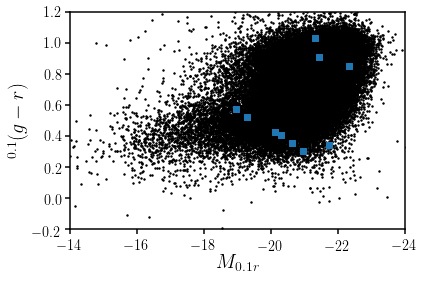

In [50]:
fig = plt.figure()#figsize=(8,4))
sub = fig.add_subplot(111)
sub.scatter(absmag_ugriz[2,:], absmag_ugriz[1,:] - absmag_ugriz[2,:], c='k', s=2)
sub.scatter(absmag_ugriz[2,i_rand], absmag_ugriz[1,i_rand] - absmag_ugriz[2,i_rand], s=30, marker='s')
sub.set_xlabel('$M_{0.1r}$', fontsize=20)
sub.set_xlim([-14., -24])
sub.set_ylabel('$^{0.1}(g-r)$', fontsize=20)
sub.set_ylim([-0.2, 1.2])


In [8]:
# compile z, M_r0.1, 0.1(g-r)
gleg_meta = np.vstack([
    redshift[i_rand], 
    absmag_ugriz[2,i_rand], 
    absmag_ugriz[1,i_rand] - absmag_ugriz[2,i_rand]]).T

In [9]:
bgs3 = FM.BGStree()
match, _ = bgs3.Query(gleg_meta)

INFO:io.py:1015:read_basis_templates: Reading /Volumes/chang_eHDD/projects/desi/spectro/templates/basis_templates/v2.3/bgs_templates_v2.1.fits metadata.


In [10]:
bgstemp = FM.BGStemplates(wavemin=1500., wavemax=2e4)

INFO:io.py:1027:read_basis_templates: Reading /Volumes/chang_eHDD/projects/desi/spectro/templates/basis_templates/v2.3/bgs_templates_v2.1.fits


In [11]:
vdisp = np.repeat(100.0, len(i_rand))

In [12]:
flux_temp, wave_temp, meta_temp = bgstemp.Spectra(
    gleg['gama-photo']['modelmag_r'][i_rand], redshift[i_rand], vdisp, seed=1, templateid=match)

Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

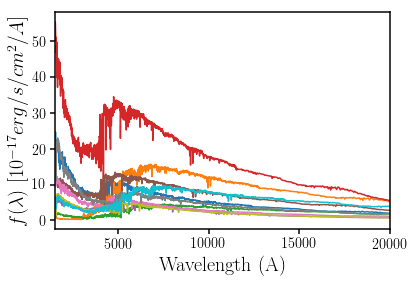

In [51]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(flux_temp.shape[0]): 
    sub.plot(wave_temp, flux_temp[i].T)
sub.set_xlabel('Wavelength (A)', fontsize=20)
sub.set_xlim([1500., 2e4])
sub.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)

In [49]:
print gleg['gama-spec']['z_helio'][i_rand]
print gleg['gama-spec']['iha'][i_rand]
print gleg['gama-spec']['ha'][i_rand]
print gleg['gama-spec']['hasig'][i_rand]
print gleg['gama-spec']['haew'][i_rand]

[0.13347 0.16476 0.29605 0.05254 0.21929 0.06991 0.18558 0.28696 0.26895
 0.29762]
[3.76357e+02 4.75523e-01 8.43284e+01 2.94180e+02 1.46046e+02 1.73008e+02
 2.26174e+02 3.23324e+02 8.32967e+02 7.85961e+01]
[3.77509e+02 2.55154e+00 1.44174e+01 3.07913e+02 1.45069e+02 1.75082e+02
 2.30452e+02 2.71095e+02 8.14606e+02 7.40156e-09]
[ 2.46798 -1.      -1.       2.30172  2.90403  2.29138  2.53808  2.31603
  2.95473  6.34108]
[4.91197e+01 1.61585e-01 3.50939e+00 1.16095e+01 3.09514e+01 1.63420e+01
 4.75001e+01 3.76282e+01 2.00376e+02 3.33403e-10]


In [17]:
L_ha = 6563. # rest frame H-alpha

In [19]:
gauss_norm = gleg['gama-spec']['ha'][i_rand]/np.sqrt(2.*np.pi*gleg['gama-spec']['hasig'][i_rand]**2)

In [28]:
def gauss(x, mu, sig): 
    return np.exp(-(x-mu)**2/(2.*sig**2))

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

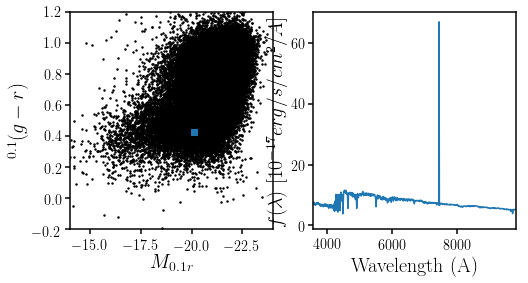

In [57]:
fig = plt.figure(figsize=(8,4))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
sub1.scatter(absmag_ugriz[2,:], absmag_ugriz[1,:] - absmag_ugriz[2,:], c='k', s=2)
sub1.scatter(absmag_ugriz[2,i_rand[0]], absmag_ugriz[1,i_rand[0]] - absmag_ugriz[2,i_rand[0]],
             s=30, marker='s')
sub2.plot(wave_temp, flux_temp[0].T + 
          gauss_norm[0] * gauss(wave_temp, L_ha*(1.+redshift[i_rand][0]), gleg['gama-spec']['hasig'][i_rand][0]))
sub1.set_xlabel('$M_{0.1r}$', fontsize=20)
sub1.set_xlim([-14., -24])
sub1.set_ylabel('$^{0.1}(g-r)$', fontsize=20)
sub1.set_ylim([-0.2, 1.2])
sub2.set_xlabel('Wavelength (A)', fontsize=20)
sub2.set_xlim([3600., 9800.])
sub2.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)
#sub.set_ylim([2., 12.])

0.05254


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

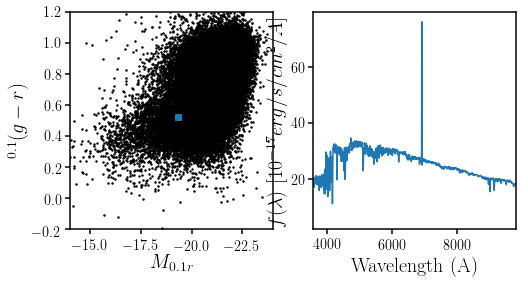

In [61]:
print redshift[i_rand][3]
fig = plt.figure(figsize=(8,4))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
sub1.scatter(absmag_ugriz[2,:], absmag_ugriz[1,:] - absmag_ugriz[2,:], c='k', s=2)
sub1.scatter(absmag_ugriz[2,i_rand[3]], absmag_ugriz[1,i_rand[3]] - absmag_ugriz[2,i_rand[3]],
             s=30, marker='s')
sub2.plot(wave_temp, flux_temp[3].T + gauss_norm[3] * gauss(wave_temp, L_ha*(1.+redshift[i_rand][3]), gleg['gama-spec']['hasig'][i_rand][3]))
sub1.set_xlabel('$M_{0.1r}$', fontsize=20)
sub1.set_xlim([-14., -24])
sub1.set_ylabel('$^{0.1}(g-r)$', fontsize=20)
sub1.set_ylim([-0.2, 1.2])
sub2.set_xlabel('Wavelength (A)', fontsize=20)
sub2.set_xlim([3600., 9800.])
sub2.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)
#sub.set_ylim([2., 12.])

0.21929


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

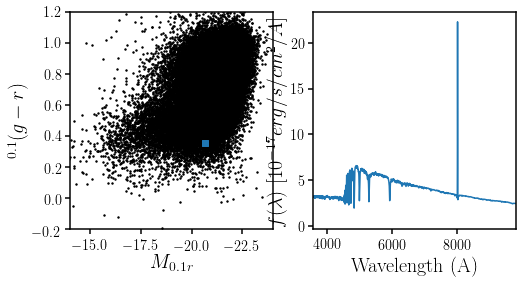

In [62]:
ii = 4
print redshift[i_rand][ii]
fig = plt.figure(figsize=(8,4))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
sub1.scatter(absmag_ugriz[2,:], absmag_ugriz[1,:] - absmag_ugriz[2,:], c='k', s=2)
sub1.scatter(absmag_ugriz[2,i_rand[ii]], absmag_ugriz[1,i_rand[ii]] - absmag_ugriz[2,i_rand[ii]],
             s=30, marker='s')
sub2.plot(wave_temp, flux_temp[ii].T + 
          gauss_norm[ii] * gauss(wave_temp, L_ha*(1.+redshift[i_rand][ii]), gleg['gama-spec']['hasig'][i_rand][ii]))
sub1.set_xlabel('$M_{0.1r}$', fontsize=20)
sub1.set_xlim([-14., -24])
sub1.set_ylabel('$^{0.1}(g-r)$', fontsize=20)
sub1.set_ylim([-0.2, 1.2])
sub2.set_xlabel('Wavelength (A)', fontsize=20)
sub2.set_xlim([3600., 9800.])
sub2.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)
#sub.set_ylim([2., 12.])

0.06991


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

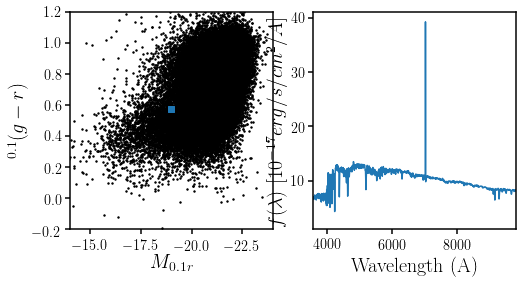

In [63]:
ii = 5
print redshift[i_rand][ii]
fig = plt.figure(figsize=(8,4))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
sub1.scatter(absmag_ugriz[2,:], absmag_ugriz[1,:] - absmag_ugriz[2,:], c='k', s=2)
sub1.scatter(absmag_ugriz[2,i_rand[ii]], absmag_ugriz[1,i_rand[ii]] - absmag_ugriz[2,i_rand[ii]],
             s=30, marker='s')
sub2.plot(wave_temp, flux_temp[ii].T + 
          gauss_norm[ii] * gauss(wave_temp, L_ha*(1.+redshift[i_rand][ii]), gleg['gama-spec']['hasig'][i_rand][ii]))
sub1.set_xlabel('$M_{0.1r}$', fontsize=20)
sub1.set_xlim([-14., -24])
sub1.set_ylabel('$^{0.1}(g-r)$', fontsize=20)
sub1.set_ylim([-0.2, 1.2])
sub2.set_xlabel('Wavelength (A)', fontsize=20)
sub2.set_xlim([3600., 9800.])
sub2.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)
#sub.set_ylim([2., 12.])

0.29762


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

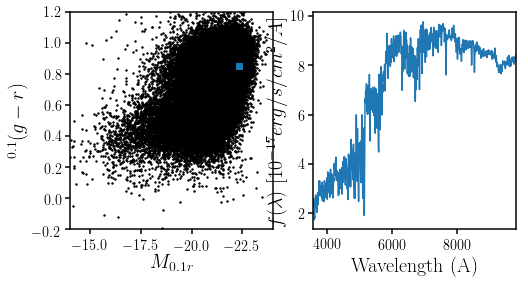

In [67]:
ii = 9
print redshift[i_rand][ii]
fig = plt.figure(figsize=(8,4))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
sub1.scatter(absmag_ugriz[2,:], absmag_ugriz[1,:] - absmag_ugriz[2,:], c='k', s=2)
sub1.scatter(absmag_ugriz[2,i_rand[ii]], absmag_ugriz[1,i_rand[ii]] - absmag_ugriz[2,i_rand[ii]],
             s=30, marker='s')
sub2.plot(wave_temp, flux_temp[ii].T + 
          gauss_norm[ii] * gauss(wave_temp, L_ha*(1.+redshift[i_rand][ii]), gleg['gama-spec']['hasig'][i_rand][ii]))
sub1.set_xlabel('$M_{0.1r}$', fontsize=20)
sub1.set_xlim([-14., -24])
sub1.set_ylabel('$^{0.1}(g-r)$', fontsize=20)
sub1.set_ylim([-0.2, 1.2])
sub2.set_xlabel('Wavelength (A)', fontsize=20)
sub2.set_xlim([3600., 9800.])
sub2.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)
#sub.set_ylim([2., 12.])